<a href="https://colab.research.google.com/github/AlqarniMohammed/vegetation-classifier/blob/master/vegetation_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn import set_config

## 1.1 Load Data

In [ ]:
# Loading our dataset
data = pd.read_csv('covtype.csv')

# Showing the first five rows
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
data.shape

(581012, 55)

In [ ]:
data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
df_Wilderness_Area = data[['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']]

In [ ]:
df_Soil_Type = data[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']]

In [ ]:
df_Soil_Type['Soil_Type'] = df_Soil_Type.idxmax(axis=1)

<ipython-input-10-1fc6407217c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Soil_Type['Soil_Type'] = df_Soil_Type.idxmax(axis=1)


In [ ]:
df_Wilderness_Area['wilderness'] = df_Wilderness_Area.idxmax(axis=1)

<ipython-input-11-e1a6a531b5d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Wilderness_Area['wilderness'] = df_Wilderness_Area.idxmax(axis=1)


In [ ]:


df_Wilderness_Area = df_Wilderness_Area[['wilderness']]
df_Wilderness_Area.head()

,wilderness
0,Wilderness_Area1
1,Wilderness_Area1
2,Wilderness_Area1
3,Wilderness_Area1
4,Wilderness_Area1


In [ ]:
wilderness_mapping = {
    'Wilderness_Area1': 'Rawah Wilderness Area',
    'Wilderness_Area2': 'Neota Wilderness Area',
    'Wilderness_Area3': 'Comanche Peak Wilderness Area',
    'Wilderness_Area4': 'Cache la Poudre Wilderness Area'
}

df_Wilderness_Area = df_Wilderness_Area.replace(wilderness_mapping)
df_Wilderness_Area

,wilderness
0,Rawah Wilderness Area
1,Rawah Wilderness Area
2,Rawah Wilderness Area
3,Rawah Wilderness Area
4,Rawah Wilderness Area
...,...
581007,Comanche Peak Wilderness Area
581008,Comanche Peak Wilderness Area
581009,Comanche Peak Wilderness Area
581010,Comanche Peak Wilderness Area


In [ ]:

soil_type_mapping = {
    'Soil_Type1': 'Cathedral family - Rock outcrop complex, extremely stony',
    'Soil_Type2': 'Vanet - Ratake families complex, very stony',
    'Soil_Type3': 'Haploborolis - Rock outcrop complex, rubbly',
    'Soil_Type4': 'Ratake family - Rock outcrop complex, rubbly',
    'Soil_Type5': 'Vanet family - Rock outcrop complex complex, rubbly',
    'Soil_Type6': 'Vanet - Wetmore families - Rock outcrop complex, stony',
    'Soil_Type7': 'Gothic family',
    'Soil_Type8': 'Supervisor - Limber families complex',
    'Soil_Type9': 'Troutville family, very stony',
    'Soil_Type10': 'Bullwark - Catamount families - Rock outcrop complex, rubbly',
    'Soil_Type11': 'Bullwark - Catamount families - Rock land complex, rubbly',
    'Soil_Type12': 'Legault family - Rock land complex, stony',
    'Soil_Type13': 'Catamount family - Rock land - Bullwark family complex, rubbly',
    'Soil_Type14': 'Pachic Argiborolis - Aquolis complex',
    'Soil_Type15': 'unspecified in the USFS Soil and ELU Survey',
    'Soil_Type16': 'Cryaquolis - Cryoborolis complex',
    'Soil_Type17': 'Gateview family - Cryaquolis complex',
    'Soil_Type18': 'Rogert family, very stony',
    'Soil_Type19': 'Typic Cryaquolis - Borohemists complex',
    'Soil_Type20': 'Typic Cryaquepts - Typic Cryaquolls complex',
    'Soil_Type21': 'Typic Cryaquolls - Leighcan family, till substratum complex',
    'Soil_Type22': 'Leighcan family, till substratum, extremely bouldery',
    'Soil_Type23': 'Leighcan family, till substratum - Typic Cryaquolls complex',
    'Soil_Type24': 'Leighcan family, extremely stony',
    'Soil_Type25': 'Leighcan family, warm, extremely stony',
    'Soil_Type26': 'Granile - Catamount families complex, very stony',
    'Soil_Type27': 'Leighcan family, warm - Rock outcrop complex, extremely stony',
    'Soil_Type28': 'Leighcan family - Rock outcrop complex, extremely stony',
    'Soil_Type29': 'Como - Legault families complex, extremely stony',
    'Soil_Type30': 'Como family - Rock land - Legault family complex, extremely stony',
    'Soil_Type31': 'Leighcan - Catamount families complex, extremely stony',
    'Soil_Type32': 'Catamount family - Rock outcrop - Leighcan family complex, extremely stony',
    'Soil_Type33': 'Leighcan - Catamount families - Rock outcrop complex, extremely stony',
    'Soil_Type34': 'Cryorthents - Rock land complex, extremely stony',
    'Soil_Type35': 'Cryumbrepts - Rock outcrop - Cryaquepts complex',
    'Soil_Type36': 'Bross family - Rock land - Cryumbrepts complex, extremely stony',
    'Soil_Type37': 'Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony',
    'Soil_Type38': 'Leighcan - Moran families - Cryaquolls complex, extremely stony',
    'Soil_Type39': 'Moran family - Cryorthents - Leighcan family complex, extremely stony',
    'Soil_Type40': 'Moran family - Cryorthents - Rock land complex, extremely stony'
}

df_Soil_Type = df_Soil_Type.replace(soil_type_mapping)

df_Soil_Type = df_Soil_Type[['Soil_Type']]

In [ ]:


df_cover_type = data[['Cover_Type']]

In [ ]:
cover_type_mapping = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}

df_cover_type = df_cover_type.replace(cover_type_mapping)
df_cover_type

,Cover_Type
0,Aspen
1,Aspen
2,Lodgepole Pine
3,Lodgepole Pine
4,Aspen
...,...
581007,Ponderosa Pine
581008,Ponderosa Pine
581009,Ponderosa Pine
581010,Ponderosa Pine


In [ ]:
df_cover_type.columns = ['cover_type']

In [ ]:
df_Wilderness_Area.shape, df_Soil_Type.shape, df_cover_type.shape

((581012, 1), (581012, 1), (581012, 1))

In [ ]:
unEncoded_data = pd.concat([data.iloc[:, :10],
                           df_Wilderness_Area, df_Soil_Type, df_cover_type, data.iloc[:, 10:]], axis=1)

In [ ]:
unEncoded_data = unEncoded_data.drop(['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type'], axis=1)

In [ ]:
unEncoded_data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'wilderness', 'Soil_Type',
       'cover_type'],
      dtype='object')

In [ ]:
unEncoded_data.dtypes

,0
Elevation,int64
Aspect,int64
Slope,int64
Horizontal_Distance_To_Hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Hillshade_9am,int64
Hillshade_Noon,int64
Hillshade_3pm,int64
Horizontal_Distance_To_Fire_Points,int64


In [ ]:
unEncoded_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,wilderness,Soil_Type,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah Wilderness Area,"Como - Legault families complex, extremely stony",Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah Wilderness Area,"Como - Legault families complex, extremely stony",Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah Wilderness Area,"Legault family - Rock land complex, stony",Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah Wilderness Area,Como family - Rock land - Legault family compl...,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah Wilderness Area,"Como - Legault families complex, extremely stony",Aspen


## 1.2 Compress Data

In [ ]:
unEncoded_data.dtypes

,0
Elevation,int64
Aspect,int64
Slope,int64
Horizontal_Distance_To_Hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Hillshade_9am,int64
Hillshade_Noon,int64
Hillshade_3pm,int64
Horizontal_Distance_To_Fire_Points,int64


In [ ]:
def compress(df, **kwargs):
    """
    Reduces the size of the DataFrame by downcasting numerical columns
    """
    input_size = df.memory_usage(index=True).sum()/ 1024**2
    print("old dataframe size: ", round(input_size,2), 'MB')

    in_size = df.memory_usage(index=True).sum()

    for t in ["float", "integer"]:
        l_cols = list(df.select_dtypes(include=t))

        for col in l_cols:
            df[col] = pd.to_numeric(df[col], downcast=t)

    out_size = df.memory_usage(index=True).sum()
    ratio = (1 - round(out_size / in_size, 2)) * 100

    print("optimized size by {} %".format(round(ratio,2)))
    print("new DataFrame size: ", round(out_size / 1024**2,2), " MB")

    return df

In [ ]:
unEncoded_data = compress(unEncoded_data,verbose = 2)
unEncoded_data.head()

old dataframe size:  57.63 MB
optimized size by 59.0 %
new DataFrame size:  23.83  MB


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,wilderness,Soil_Type,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah Wilderness Area,"Como - Legault families complex, extremely stony",Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah Wilderness Area,"Como - Legault families complex, extremely stony",Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah Wilderness Area,"Legault family - Rock land complex, stony",Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah Wilderness Area,Como family - Rock land - Legault family compl...,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah Wilderness Area,"Como - Legault families complex, extremely stony",Aspen


## 1.3 Clean Data

In [ ]:
duplicate_count = len(unEncoded_data) - len(unEncoded_data.drop_duplicates()) # Original data length minus data length without duplicates
duplicate_count

0

In [ ]:
round(unEncoded_data.isnull().sum().sort_values(ascending=False)/len(unEncoded_data),2) #NaN percentage for each column

,0
Elevation,0.0
Aspect,0.0
Slope,0.0
Horizontal_Distance_To_Hydrology,0.0
Vertical_Distance_To_Hydrology,0.0
Horizontal_Distance_To_Roadways,0.0
Hillshade_9am,0.0
Hillshade_Noon,0.0
Hillshade_3pm,0.0
Horizontal_Distance_To_Fire_Points,0.0


In [ ]:
unEncoded_data = unEncoded_data[unEncoded_data.Elevation > 0]
unEncoded_data = unEncoded_data[unEncoded_data.Horizontal_Distance_To_Hydrology > 0]
unEncoded_data = unEncoded_data[unEncoded_data.Horizontal_Distance_To_Roadways > 0]
unEncoded_data = unEncoded_data[unEncoded_data.Horizontal_Distance_To_Fire_Points > 0]

In [ ]:
unEncoded_data.shape

(556246, 13)

## 1.4 Visualize Data

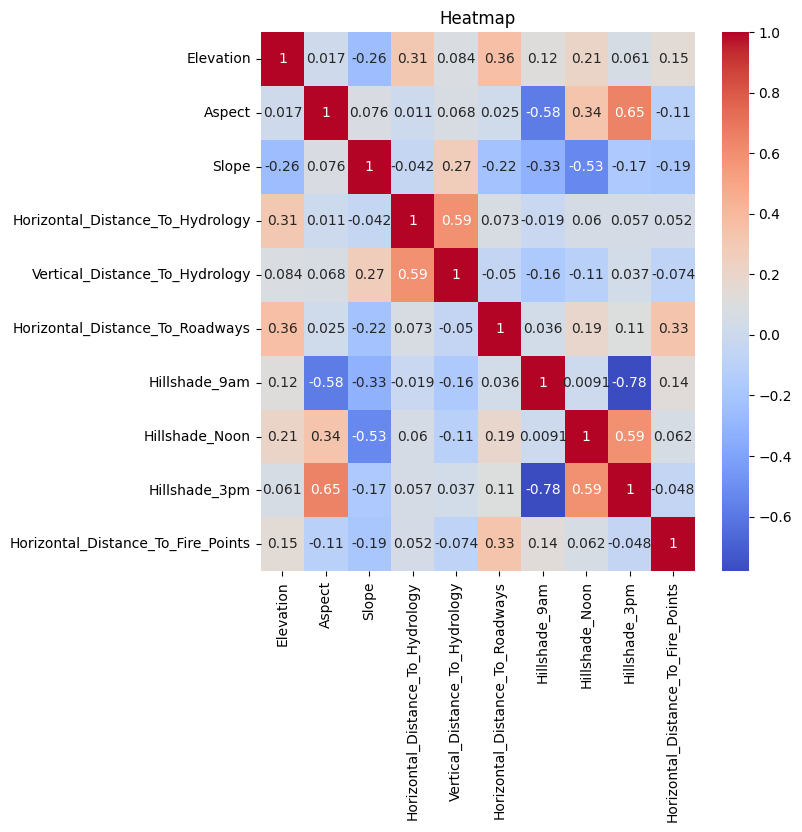

In [ ]:
plt.figure(figsize=(7, 7))

numeric_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points' ]

corr = unEncoded_data[numeric_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Heatmap')
plt.show()

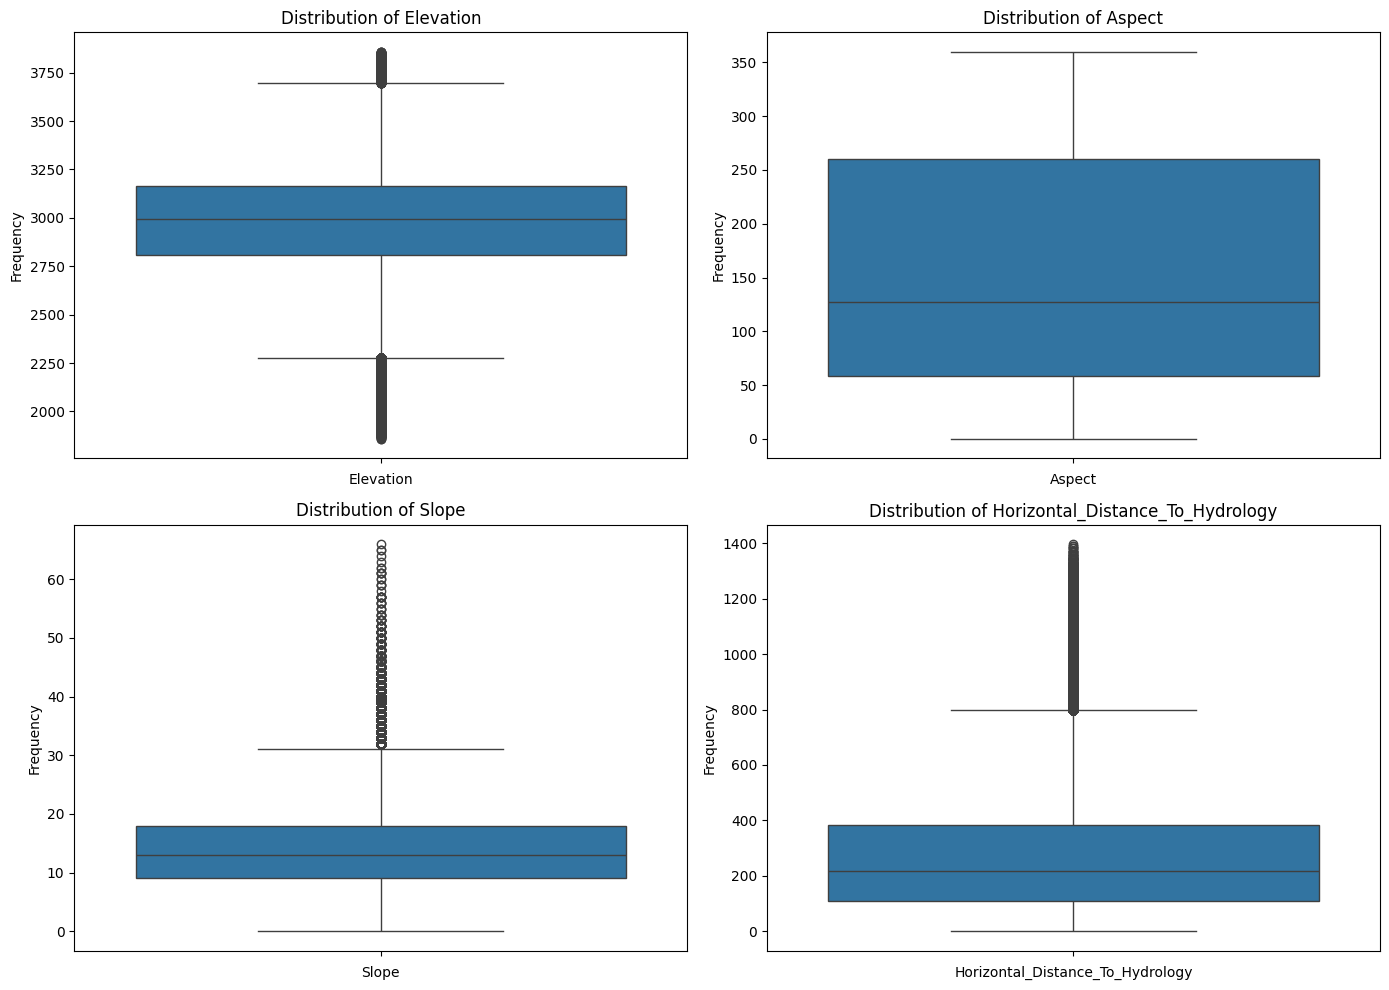

In [ ]:
features_to_plot = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

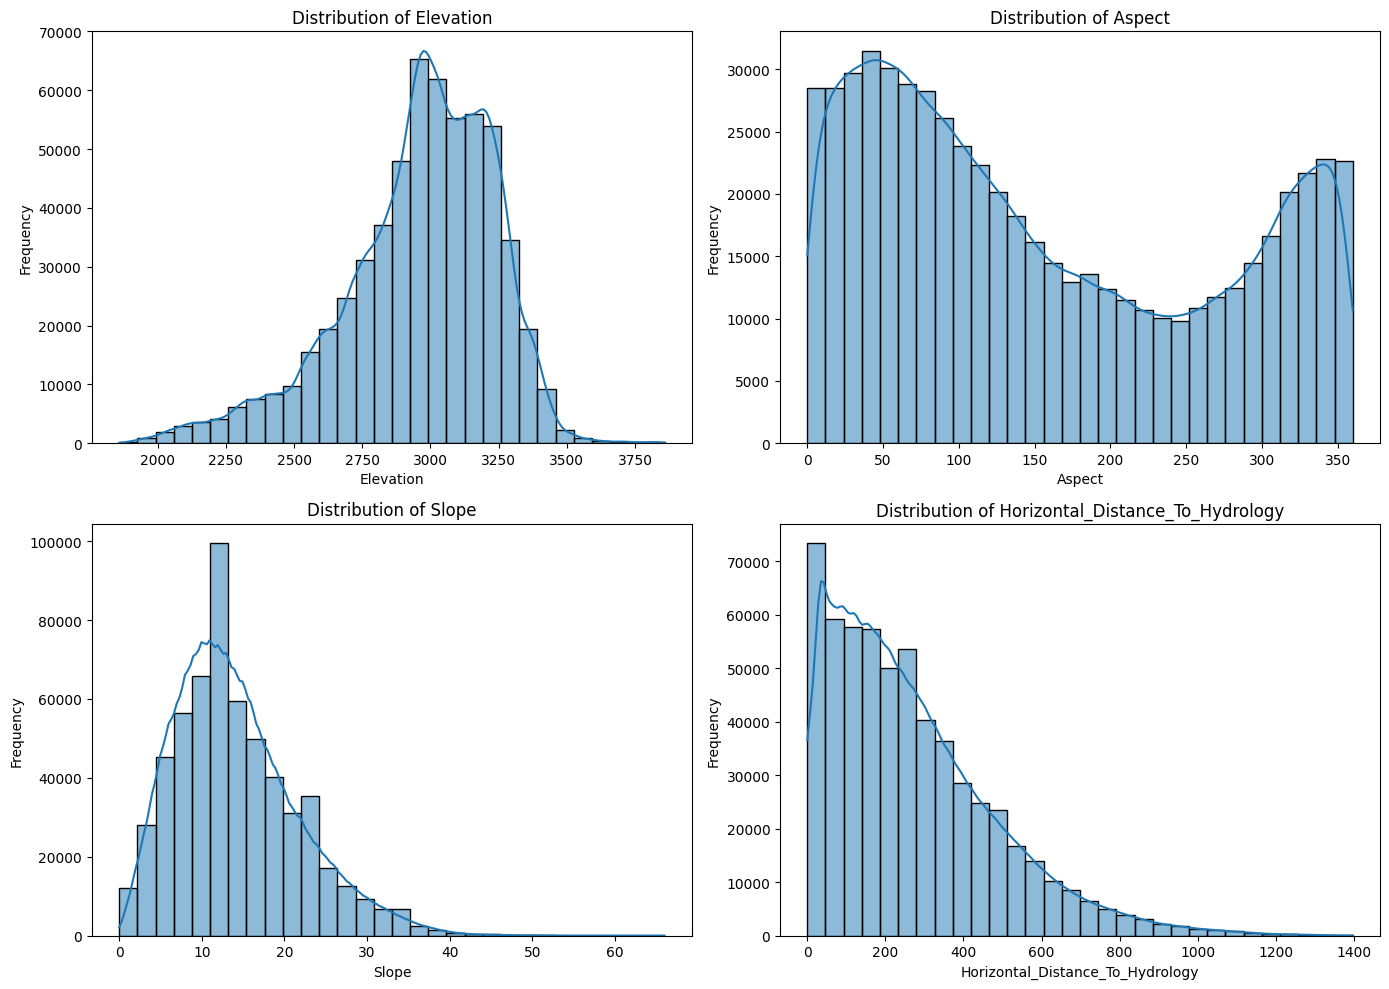

In [ ]:
features_to_plot = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

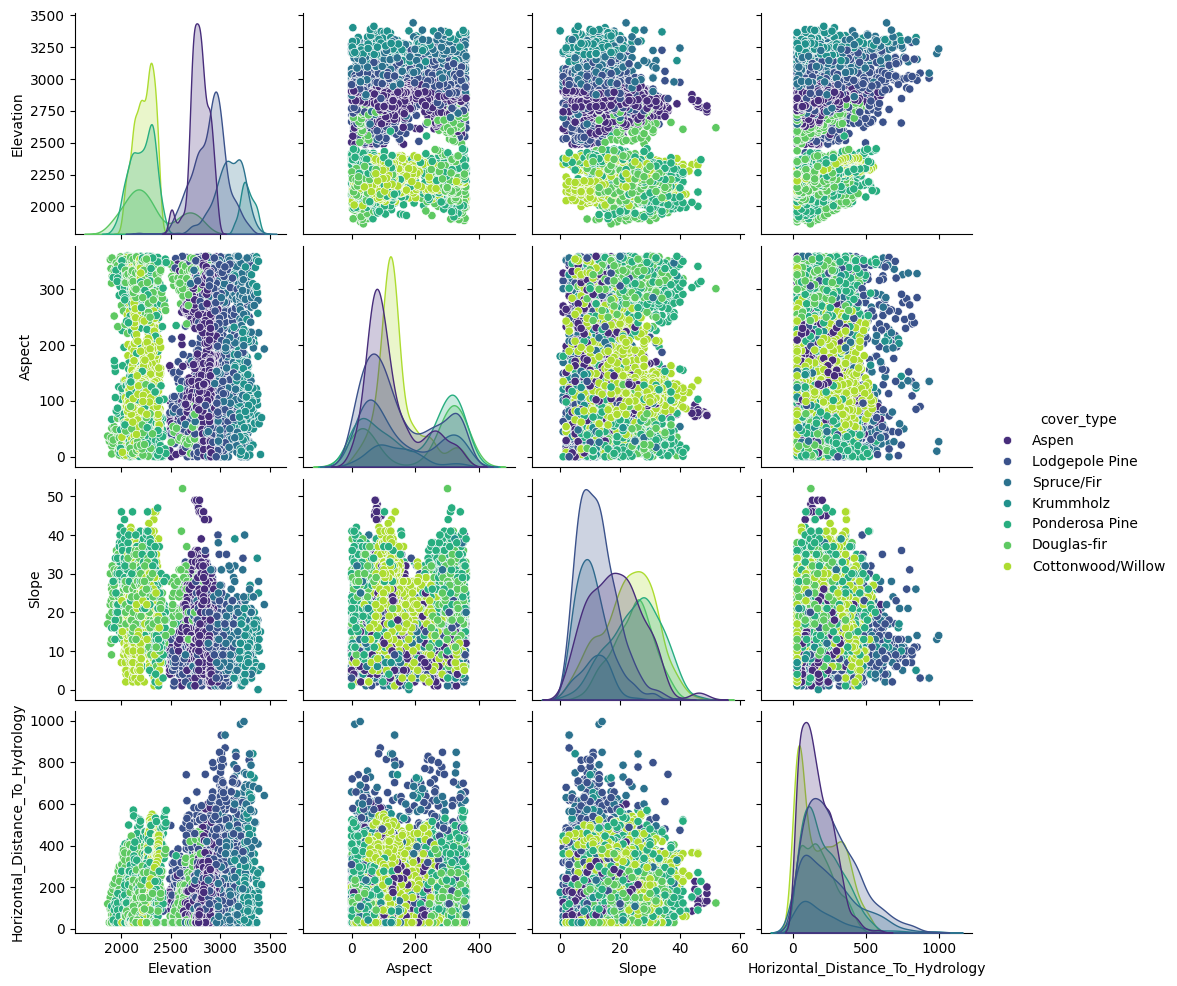

In [ ]:
features_to_plot = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'cover_type']

# you can increse the number of rows
sns.pairplot(unEncoded_data.loc[:5000,features_to_plot], hue='cover_type', palette='viridis', diag_kind='kde')

# 2 - Data Pre-Processer

## Train/Test Split

In [ ]:
# Split into features (X) and target (y)
X = unEncoded_data.drop('cover_type', axis=1)  # Drop the target column 'Cover_Type'
y = unEncoded_data['cover_type']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state = 42)

## 2.1 Emouting

In [ ]:
oh_encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
label_encoder = LabelEncoder()

# OneHotEncoding for 'wilderness'
wilderness_encoded_train = oh_encoder.fit_transform(X_train[['wilderness']])
wilderness_encoded_test = oh_encoder.transform(X_test[['wilderness']])

wilderness_train_df = pd.DataFrame(
    wilderness_encoded_train,
    columns=oh_encoder.get_feature_names_out()
)

wilderness_test_df = pd.DataFrame(
    wilderness_encoded_test,
    columns=oh_encoder.get_feature_names_out()
)


soil_encoded_train = oh_encoder.fit_transform(X_train[['Soil_Type']])
soil_encoded_test = oh_encoder.transform(X_test[['Soil_Type']])

soil_train_df = pd.DataFrame(
    soil_encoded_train,
    columns=oh_encoder.get_feature_names_out()
)

soil_test_df = pd.DataFrame(
    soil_encoded_test,
    columns=oh_encoder.get_feature_names_out()
)

## 2.2 Scaling

In [ ]:
# Initialize scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
oh_encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
label_encoder = LabelEncoder()

# 1. StandardScaler for Elevation
X_train['Elevation'] = standard_scaler.fit_transform(X_train[['Elevation']])
X_test['Elevation'] = standard_scaler.transform(X_test[['Elevation']])

# 2. MinMaxScaler for Aspect
X_train['Aspect'] = min_max_scaler.fit_transform(X_train[['Aspect']])
X_test['Aspect'] = min_max_scaler.transform(X_test[['Aspect']])

# 3. StandardScaler for Slope
X_train['Slope'] = standard_scaler.fit_transform(X_train[['Slope']])
X_test['Slope'] = standard_scaler.transform(X_test[['Slope']])

# 4. RobustScaler for Horizontal_Distance_To_Hydrology
X_train['Horizontal_Distance_To_Hydrology'] = robust_scaler.fit_transform(X_train[['Horizontal_Distance_To_Hydrology']])
X_test['Horizontal_Distance_To_Hydrology'] = robust_scaler.transform(X_test[['Horizontal_Distance_To_Hydrology']])

# 5. RobustScaler for Vertical_Distance_To_Hydrology
X_train['Vertical_Distance_To_Hydrology'] = robust_scaler.fit_transform(X_train[['Vertical_Distance_To_Hydrology']])
X_test['Vertical_Distance_To_Hydrology'] = robust_scaler.transform(X_test[['Vertical_Distance_To_Hydrology']])

# 6. RobustScaler for Horizontal_Distance_To_Roadways
X_train['Horizontal_Distance_To_Roadways'] = robust_scaler.fit_transform(X_train[['Horizontal_Distance_To_Roadways']])
X_test['Horizontal_Distance_To_Roadways'] = robust_scaler.transform(X_test[['Horizontal_Distance_To_Roadways']])

# 7. MinMaxScaler for Hillshade_9am, Hillshade_Noon, Hillshade_3pm
X_train['Hillshade_9am'] = min_max_scaler.fit_transform(X_train[['Hillshade_9am']])
X_test['Hillshade_9am'] = min_max_scaler.transform(X_test[['Hillshade_9am']])

X_train['Hillshade_Noon'] = min_max_scaler.fit_transform(X_train[['Hillshade_Noon']])
X_test['Hillshade_Noon'] = min_max_scaler.transform(X_test[['Hillshade_Noon']])

X_train['Hillshade_3pm'] = min_max_scaler.fit_transform(X_train[['Hillshade_3pm']])
X_test['Hillshade_3pm'] = min_max_scaler.transform(X_test[['Hillshade_3pm']])

# 8. RobustScaler for Horizontal_Distance_To_Fire_Points
X_train['Horizontal_Distance_To_Fire_Points'] = robust_scaler.fit_transform(X_train[['Horizontal_Distance_To_Fire_Points']])
X_test['Horizontal_Distance_To_Fire_Points'] = robust_scaler.transform(X_test[['Horizontal_Distance_To_Fire_Points']])

# OneHotEncoding for 'wilderness'
wilderness_encoded_train = oh_encoder.fit_transform(X_train[['wilderness']])
wilderness_encoded_test = oh_encoder.transform(X_test[['wilderness']])

wilderness_train_df = pd.DataFrame(
    wilderness_encoded_train,
    columns=oh_encoder.get_feature_names_out()
)

wilderness_test_df = pd.DataFrame(
    wilderness_encoded_test,
    columns=oh_encoder.get_feature_names_out()
)

soil_encoded_train = oh_encoder.fit_transform(X_train[['Soil_Type']])
soil_encoded_test = oh_encoder.transform(X_test[['Soil_Type']])

soil_train_df = pd.DataFrame(
    soil_encoded_train,
    columns=oh_encoder.get_feature_names_out()
)

soil_test_df = pd.DataFrame(
    soil_encoded_test,
    columns=oh_encoder.get_feature_names_out()
)

X_train = X_train.drop(columns=['wilderness', 'Soil_Type']).reset_index(drop=True)
X_test = X_test.drop(columns=['wilderness', 'Soil_Type']).reset_index(drop=True)

X_train = pd.concat([X_train, wilderness_train_df, soil_train_df], axis=1)
X_test = pd.concat([X_test, wilderness_test_df, soil_test_df], axis=1)

print(f"Shape of X_train after encoding: {X_train.shape}")
print(f"Shape of X_test after encoding: {X_test.shape}")

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print(f"Final shape of X_train: {X_train.shape}, X_test: {X_test.shape}")

# Label encoding for target variable
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Shape of X_train after encoding: (444996, 54)
Shape of X_test after encoding: (111250, 54)
Final shape of X_train: (444996, 54), X_test: (111250, 54)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((444996, 54), (111250, 54), (444996,), (111250,))

In [ ]:
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,"Soil_Type_Rogert family, very stony",Soil_Type_Supervisor - Limber families complex,"Soil_Type_Troutville family, very stony",Soil_Type_Typic Cryaquepts - Typic Cryaquolls complex,Soil_Type_Typic Cryaquolis - Borohemists complex,"Soil_Type_Typic Cryaquolls - Leighcan family, till substratum complex","Soil_Type_Vanet - Ratake families complex, very stony","Soil_Type_Vanet - Wetmore families - Rock outcrop complex, stony","Soil_Type_Vanet family - Rock outcrop complex complex, rubbly",Soil_Type_unspecified in the USFS Soil and ELU Survey
0,0.456447,0.777778,-0.969449,0.701107,-0.612903,0.220278,0.795276,0.948819,0.700787,0.277014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.380783,0.936111,-0.036958,0.782288,0.983871,0.650067,0.744094,0.866142,0.669291,1.087099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.237704,0.944444,-0.569810,-0.708487,-0.483871,0.578735,0.787402,0.889764,0.649606,0.053700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.629470,0.813889,2.360877,0.180812,1.725806,-0.495289,0.460630,0.846457,0.901575,-0.510806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.104629,0.380556,-0.703023,-0.309963,-0.709677,-0.164199,0.921260,0.933071,0.523622,-0.481336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

array([6, 3, 4, ..., 6, 4, 4])

# 3 -  Feature Selection

In [ ]:
# Fit model
log_model = LogisticRegression().fit(X_train, y_train)

# Perform the permutation
permutation_score = permutation_importance(log_model, X_train, y_train, n_repeats=10)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T)
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,feature,score decrease
0,Elevation,0.27916
13,wilderness_Rawah Wilderness Area,0.07409
11,wilderness_Comanche Peak Wilderness Area,0.058983
7,Hillshade_Noon,0.023919
3,Horizontal_Distance_To_Hydrology,0.016098
2,Slope,0.010405
42,Soil_Type_Ratake family - Rock outcrop complex...,0.009412
18,Soil_Type_Catamount family - Rock outcrop - Le...,0.009092
12,wilderness_Neota Wilderness Area,0.007473
9,Horizontal_Distance_To_Fire_Points,0.006429


In [ ]:
# Apply SelectKBest to select top 'k' features
k = 10  # Adjust this value to choose how many features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Print the selected features
print("Selected Features using SelectKBest:", selected_features)

Selected Features using SelectKBest: Index(['Elevation', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area1',
       'Wilderness_Area4', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4',
       'Soil_Type10', 'Soil_Type38', 'Soil_Type39'],
      dtype='object')


# 4 - Pipelines


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config


def numeric_preprocessor(X_train, X_test):

    num_preprocessor = ColumnTransformer([
    ('standard_transformer', StandardScaler(), ['Elevation', 'Slope']),
    ('minmax_transformer', MinMaxScaler(), ['Aspect', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']),
    ('robust_transformer', RobustScaler(), ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                                        'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points'])]
    )

    X_train = num_preprocessor.fit_transform(X_train)
    X_test = num_preprocessor.transform(X_test)

    X_train_df = pd.DataFrame(X_train, columns=num_preprocessor.get_feature_names_out())
    X_test_df = pd.DataFrame(X_test, columns=num_preprocessor.get_feature_names_out())

    return X_train_df, X_test_df

def wilderness_preprocessor(X_train, X_test):

    oh_encoder = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore')

    wilderness_encoded_train = oh_encoder.fit_transform(X_train[['wilderness']])
    wilderness_encoded_test = oh_encoder.transform(X_test[['wilderness']])

    wilderness_train_df = pd.DataFrame(
    wilderness_encoded_train,
    columns=oh_encoder.get_feature_names_out()
    )

    wilderness_test_df = pd.DataFrame(
    wilderness_encoded_test,
    columns=oh_encoder.get_feature_names_out()
    )

    return wilderness_train_df, wilderness_test_df

def soil_preprocessor(X_train, X_test):

    oh_encoder = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore')

    soil_encoded_train = oh_encoder.fit_transform(X_train[['Soil_Type']])
    soil_encoded_test = oh_encoder.transform(X_test[['Soil_Type']])

    soil_train_df = pd.DataFrame(
    soil_encoded_train,
    columns=oh_encoder.get_feature_names_out()
    )

    soil_test_df = pd.DataFrame(
    soil_encoded_test,
    columns=oh_encoder.get_feature_names_out()
    )

    return soil_train_df, soil_test_df

def preprocessed_target(y_train, y_test):

    label_encoder = LabelEncoder()

    y_train_processed = label_encoder.fit_transform(y_train)
    y_test_processed = label_encoder.transform(y_test)

    return y_train_processed, y_test_processed


def processed_features(X_train, X_test, X_train_df, X_test_df, wilderness_train_df, wilderness_test_df, soil_train_df, soil_test_df):

    X_train = X_train.drop(columns=['wilderness', 'Soil_Type']).reset_index(drop=True)
    X_test = X_test.drop(columns=['wilderness', 'Soil_Type']).reset_index(drop=True)

    X_train_processed = pd.concat([X_train_df, wilderness_train_df, soil_train_df], axis=1)
    X_test_processed = pd.concat([X_test_df, wilderness_test_df, soil_test_df], axis=1)

    return X_train_processed, X_test_processed

def processed_data(X_train, X_test,y_train, y_test):

    pipeline = ColumnTransformer([
    ('std_transformer', StandardScaler(), ['Elevation', 'Slope']),
    ('minmax_transformer', MinMaxScaler(), ['Aspect', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']),
    ('rb_transformer', RobustScaler(), ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                                  'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']),
    ('wilderness_transformer', OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore'), ['wilderness']),
    ('Soil_Type_transformer', OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore'), ['Soil_Type'])]
    )

    label_encoder = LabelEncoder()

    y_train_processed = label_encoder.fit_transform(y_train)
    y_test_processed = label_encoder.transform(y_test)

    X_train_processed = pipeline.fit_transform(X_train)
    X_test_processed = pipeline.transform(X_test)

    set_config(display='diagram')

    return pipeline, X_train_processed, X_test_processed, y_train_processed, y_test_processed

In [ ]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

pipeline = ColumnTransformer([
('std_transformer', standard_scaler, ['Elevation', 'Slope']),
('minmax_transformer', min_max_scaler, ['Aspect', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']),
('rb_transformer', robust_scaler, ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                              'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']),
('wilderness_transformer', OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore'), ['wilderness']),
('Soil_Type_transformer', OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore'), ['Soil_Type'])]
)

pipeline.fit_transform(X_train)

array([[ 0.45644703, -0.9694494 ,  0.77777778, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38078338, -0.03695812,  0.93611111, ...,  0.        ,
         0.        ,  0.        ],
       [-0.2377044 , -0.56981028,  0.94444444, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00673287,  0.89553316,  0.37777778, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10397636, -0.9694494 ,  0.15555556, ...,  0.        ,
         0.        ,  0.        ],
       [-0.05787242, -0.43659724,  0.38611111, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
 # Visualizing Pipelines in HTML
set_config(display='diagram')

pipeline

ColumnTransformer(transformers=[('std_transformer', StandardScaler(),
                                 ['Elevation', 'Slope']),
                                ('minmax_transformer', MinMaxScaler(),
                                 ['Aspect', 'Hillshade_9am', 'Hillshade_Noon',
                                  'Hillshade_3pm']),
                                ('rb_transformer', RobustScaler(),
                                 ['Horizontal_Distance_To_Hydrology',
                                  'Vertical_Distance_To_Hydrology',
                                  'Horizontal_Distance_To_Roadways',
                                  'Horizontal_Distance_To_Fire_Points']),
                                ('wilderness_transformer',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['wilderness']),
                                ('Soil_Type_transformer',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Soil_Type'])])

In [ ]:
import pickle
with open("pipeline2.pkl", "wb") as file:
        pickle.dump(pipeline, file)

In [ ]:
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)
y_train_processed = label_encoder.fit_transform(y_train)
y_test_processed = label_encoder.transform(y_test)

NameError: name 'label_encoder' is not defined

In [ ]:
X_train_df, X_test_df = numeric_preprocessor(X_train, X_test)

In [ ]:
wilderness_train_df, wilderness_test_df = wilderness_preprocessor(X_train, X_test)

In [ ]:
soil_train_df, soil_test_df = soil_preprocessor(X_train, X_test)

In [ ]:
X_train_processed, X_test_processed = processed_data(X_train, X_test, X_train_df, X_test_df, wilderness_train_df, wilderness_test_df, soil_train_df, soil_test_df)

# 5 - Baseline Model

In [ ]:
baseline_model = LogisticRegression()

baseline_model.fit(X_train, y_train)

scoring = ['accuracy', 'recall', 'precision']

cv_results = cross_validate(baseline_model, X_train, y_train, cv = 5, scoring = scoring)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
y_pred = baseline_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_precision = precision_score(y_test, y_pred, average='macro')
baseline_recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {baseline_accuracy}')
print(f'Precision: {baseline_precision}')
print(f'Recall: {baseline_recall}')

Accuracy: 0.729276404494382
Precision: 0.6174098313685862
Recall: 0.49446654137988805


# 6 - Model Selection

In [ ]:
X_train.shape

(444996, 54)

In [ ]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 10, max_features = 'sqrt', n_jobs = -1)

model.fit(X_train, y_train)

scoring = ['accuracy', 'recall', 'precision']

cv_results = cross_validate(model,
                            X_train,
                            y_train,
                            scoring = scoring,
                            cv = 10)

print(f"Accuracy: {cv_results['test_accuracy']}")
print(f"Recall: {cv_results['test_recall']}")
print(f"Precision: {cv_results['test_precision']}")

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2385, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/

Accuracy: [0.74763882 0.75415761 0.74832727 0.75420064 0.74987629 0.75254405
 0.7542867  0.75430821 0.75247951 0.75527108]
Recall: [nan nan nan nan nan nan nan nan nan nan]
Precision: [nan nan nan nan nan nan nan nan nan nan]
Accuracy: 0.7569684087329931
Precision: 0.7070310738008826
Recall: 0.49269919974377474


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
X_train_ = X_train[['Elevation', 'Hillshade_9am', 'Hillshade_3pm', 'Vertical_Distance_To_Hydrology',
                    'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Horizontal_Distance_To_Fire_Points', 'Hillshade_Noon', 'Slope', 'Aspect']]

X_test_ = X_test[['Elevation', 'Hillshade_9am', 'Hillshade_3pm', 'Vertical_Distance_To_Hydrology',
                    'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Horizontal_Distance_To_Fire_Points', 'Hillshade_Noon', 'Slope', 'Aspect']]

In [ ]:
X_test.shape


(111250, 12)

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Random Forest Score:", grid_search_rf.best_score_)

In [ ]:
model = RandomForestClassifier(n_estimators = 200, max_depth = 30, n_jobs = -1,min_samples_leaf = 1,min_samples_split = 2)

model.fit(X_train_processed, y_train_processed)

scoring = ['accuracy', 'recall', 'precision']

cv_results = cross_validate(model,
                            X_train_processed,
                            y_train_processed,
                            scoring = scoring,
                            cv = 5)

print(f"Accuracy: {cv_results['test_accuracy']}")
print(f"Recall: {cv_results['test_recall']}")
print(f"Precision: {cv_results['test_precision']}")

y_pred = model.predict(X_test_processed)

accuracy = accuracy_score(y_test_processed, y_pred)
precision = precision_score(y_test_processed, y_pred, average='macro')
recall = recall_score(y_test_processed, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2385, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 186, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/

Accuracy: [0.94593258 0.94561737 0.94321285 0.94477466 0.94566231]
Recall: [nan nan nan nan nan]
Precision: [nan nan nan nan nan]
Accuracy: 0.9509393258426966
Precision: 0.9558907313523847
Recall: 0.8909241594677907


In [ ]:
pd.DataFrame(y_pred).value_counts()

,count
0,
4,56825
6,38899
5,7134
3,3760
2,3048
0,1318
1,266
